<a href="https://colab.research.google.com/github/harijp57/Assignmentw11-Hari/blob/master/practicing_python_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hari Julian Putra-20123008

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# data duplicate check
print(dataset.duplicated().sum())

3


In [6]:
# drop duplicated data
dataset = dataset.drop_duplicates().reset_index(drop=True)
print(dataset.duplicated().sum())

0


In [7]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# checking label class
dataset['class'].value_counts()

,count
class,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


In [9]:
# encode the class label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['class'] = le.fit_transform(dataset['class'])
dataset['class'].value_counts()

,count
class,
1,50
2,49
0,48


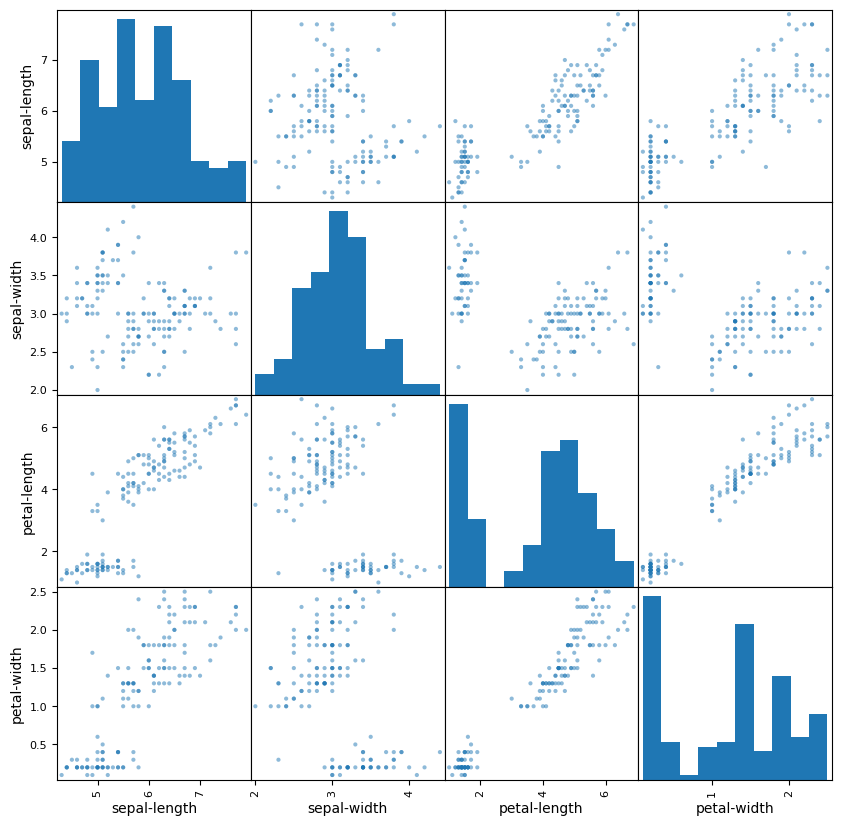

In [10]:
# Scatter Matrix
pd.plotting.scatter_matrix(dataset.drop(columns='class'), figsize=(10,10))
plt.show()

In [11]:
# split data to train and test data with 70:30 ratio
x = dataset.drop('class', axis=1)
y = dataset['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
list_models = [('LR',LogisticRegression(solver = 'liblinear', multi_class='ovr')),
               ('CART',DecisionTreeClassifier()),
               ('KNN',KNeighborsClassifier()),
               ('LDA',LinearDiscriminantAnalysis()),
               ('NB', GaussianNB()),
               ('SVM', SVC(gamma='auto'))]

In [14]:
result = []
names = []


for name, model in list_models:
  kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
  cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  result.append(cv_result)
  names.append(name)
  print(f'{name}, average accuracy = {cv_result.mean():.4f} with std = {cv_result.std():.3f}')

LR, average accuracy = 0.9227 with std = 0.085
CART, average accuracy = 0.9318 with std = 0.063
KNN, average accuracy = 0.9427 with std = 0.062
LDA, average accuracy = 0.9618 with std = 0.047
NB, average accuracy = 0.9527 with std = 0.062
SVM, average accuracy = 0.9618 with std = 0.062


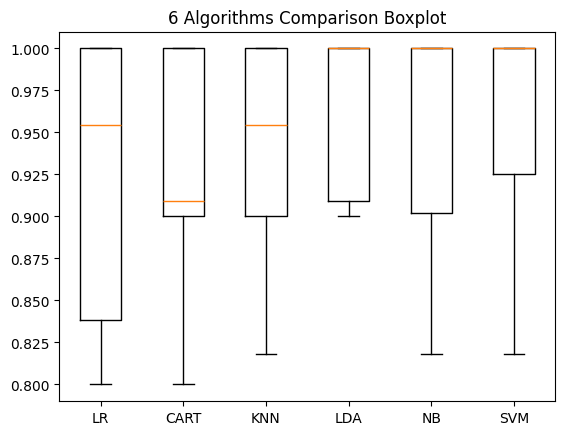

In [15]:
# compare
plt.boxplot(result, labels=names)
plt.title('6 Algorithms Comparison Boxplot')
plt.show()

In [16]:
unique, counts = np.unique(y_test.to_numpy(), return_counts=True)
ulist = list(unique)
ulist.insert(0,'Model')

clist = list(counts)
clist.insert(0,'Actual')

sum_df = pd.DataFrame([clist], columns = ulist)


results = {'Model':[], 'Accuracy':[]}
detailed_metrics = []
labels = dataset['class'].unique()

# Fit and evaluate each model
for name, model in list_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average=None)
    recall = metrics.recall_score(y_test, y_pred, average=None)
    f1 = metrics.f1_score(y_test, y_pred, average=None)

    for i, cls in enumerate(labels):
        detailed_metrics.append({
            "Model": name,
            "Class": f"{cls}",
            "Precision": precision[i],
            "Recall": recall[i],
            "F1-Score": f1[i]
        })
    results['Model'].append(name)
    results['Accuracy'].append(acc)

    temp_unique, temp_counts = np.unique(y_pred, return_counts=True)
    temp_ulist = list(temp_unique)
    temp_ulist.insert(0,'Model')

    temp_clist = list(temp_counts)
    temp_clist.insert(0,name)

    temp_sum_df = pd.DataFrame([temp_clist], columns = temp_ulist)
    sum_df = pd.concat([sum_df, temp_sum_df], ignore_index=True)

sum_df.columns = ['Model','Class_0','Class_1','Class_2']

In [17]:
# Prediction Summarize Tabel
sum_df

,Model,Class_0,Class_1,Class_2
0,Actual,16,16,13
1,LR,16,14,15
2,CART,16,16,13
3,KNN,16,14,15
4,LDA,16,17,12
5,NB,16,17,12
6,SVM,16,16,13


In [18]:
# Performance Comparison Table
acc_df = pd.DataFrame(results)
detailed_df = pd.DataFrame(detailed_metrics).round(4)
flat_df = detailed_df.pivot(index="Model", columns="Class", values=["Precision", "Recall", "F1-Score"])
flat_df.columns = [f"{metric}_{cls}" for metric, cls in flat_df.columns]
flat_df.reset_index(inplace=True)
result_df = pd.merge(acc_df, flat_df, on="Model")

result_df

,Model,Accuracy,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,F1-Score_0,F1-Score_1,F1-Score_2
0,LR,0.955556,1.0,1.0000,0.8667,1.0,0.8750,1.0000,1.0,0.9333,0.9286
1,CART,1.000000,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0,1.0000,1.0000
2,KNN,0.955556,1.0,1.0000,0.8667,1.0,0.8750,1.0000,1.0,0.9333,0.9286
3,LDA,0.977778,1.0,0.9412,1.0000,1.0,1.0000,0.9231,1.0,0.9697,0.9600
4,NB,0.933333,1.0,0.8824,0.9167,1.0,0.9375,0.8462,1.0,0.9091,0.8800
5,SVM,1.000000,1.0,1.0000,1.0000,1.0,1.0000,1.0000,1.0,1.0000,1.0000
